HW 3 - Kimberly Hess - data for project proposal

In [24]:
import numpy as np
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation
import pytz
%matplotlib inline
from astroplan import Observer, FixedTarget
from astroplan import download_IERS_A 
from astropy.coordinates import get_sun, get_moon, get_body
from astroplan import moon_illumination
import matplotlib.pyplot as plt
from astroplan.plots import plot_sky, plot_airmass
from astroplan.plots import plot_finder_image
from astroquery.skyview import SkyView

Date and Time
Dates and times are in UTC
Default time is 00:00:00 UTC 

In [25]:
date = Time("2020-03-17", format='iso')
print(date)

2020-03-17 00:00:00.000


In [27]:
now = Time.now()
print(now)
print(now.jd)
print(now.mjd)
print(now.decimalyear)

2020-02-27 16:18:33.555471
2458907.1795550403
58906.67955504017
2020.157594412678


In [28]:
print("Available observatories: \n{0}"
      .format(', '.join(EarthLocation.get_site_names())))

Available observatories: 
, , , ALMA, ATST, Anglo-Australian Observatory, Apache Point, Apache Point Observatory, Atacama Large Millimeter Array, BAO, BBSO, Beijing XingLong Observatory, Black Moshannon Observatory, CHARA, Canada-France-Hawaii Telescope, Catalina Observatory, Cerro Pachon, Cerro Paranal, Cerro Tololo, Cerro Tololo Interamerican Observatory, DCT, DKIST, Discovery Channel Telescope, Dominion Astrophysical Observatory, GBT, Gemini South, Green Bank Telescope, Hale Telescope, Haleakala Observatories, Happy Jack, IAO, JCMT, James Clerk Maxwell Telescope, Jansky Very Large Array, Keck Observatory, Kitt Peak, Kitt Peak National Observatory, La Silla Observatory, Large Binocular Telescope, Las Campanas Observatory, Lick Observatory, Lowell Observatory, MWA, Manastash Ridge Observatory, McDonald Observatory, Medicina, Medicina Dish, Michigan-Dartmouth-MIT Observatory, Mount Graham International Observatory, Mt Graham, Mt. Ekar 182 cm. Telescope, Mt. Stromlo Observatory, Multipl

## Oberserving location - Mt. Whipple - Tucson, AZ

In [29]:
Whipple = Observer.at_site("Whipple Observatory", timezone="US/Hawaii")
Whipple

<Observer: name='Whipple Observatory',
    location (lon, lat, el)=(-110.8775 deg, 31.68094444444444 deg, 2319.9999999995903 m),
    timezone=<DstTzInfo 'US/Hawaii' LMT-1 day, 13:29:00 STD>>

## Sunset, Sunrise, Midnight...

In [37]:
sunset_Whipple = Whipple.sun_set_time(now, which='nearest')
eve_twil_Whipple= Whipple.twilight_evening_astronomical(now, which='nearest')
midnight_Whipple= Whipple.midnight(now, which='next')
morn_twil_Whipple = Whipple.twilight_morning_astronomical(now, which='next')
sunrise_Whipple = Whipple.sun_rise_time(now, which='next')

## The effective length of time (in hours) available for optical astronomical observations at MLO tonight

In [89]:
mlo = Observer(location = location, timezone = 'America/Los_Angeles',
                             name = "MLO", description = "MLO 1.0-m telescope")
mlo

<Observer: name='MLO',
    location (lon, lat, el)=(-116.426938 deg, 32.842167 deg, 1859.9999999986012 m),
    timezone=<DstTzInfo 'America/Los_Angeles' LMT-1 day, 16:07:00 STD>>

## Local Sidereal Time (LST)¶


In [32]:
# # Mount Laguna Observatory is not listed in the database; let's define the location
latitude = 32.842167 * u.deg
longitude = -116.426938 * u.deg
elevation = 1860 * u.m
location = EarthLocation.from_geodetic(longitude, latitude, elevation)
mlo = Observer(location = location, timezone = 'America/Los_Angeles',
                             name = "MLO", description = "MLO 1.0-m telescope")
mlo

<Observer: name='MLO',
    location (lon, lat, el)=(-116.426938 deg, 32.842167 deg, 1859.9999999986012 m),
    timezone=<DstTzInfo 'America/Los_Angeles' LMT-1 day, 16:07:00 STD>>

## Targets for observations¶


In [192]:

# by name
target = FixedTarget.from_name('HAT-P-36') # Messier
target.coord

<SkyCoord (ICRS): (ra, dec) in deg
    (188.26627554, 44.91533252)>

In [193]:
# using coordinates
coords = SkyCoord('18h53m35.097s +33d01m44.8831s', frame='icrs') # coordinates of the Ring Nebula (M57) 


In [194]:
HATP36 = FixedTarget(name = 'HAT-P-36', coord=coords)


In [195]:
HATP36.ra.hms

hms_tuple(h=18.0, m=53.0, s=35.09699999999441)

## Is the target up?

Check to see if target is "up" at evening twilight (assume "up" means more than 30 degrees above the horizon). Also check if target is available at midnight and morning twilight.


In [196]:
# check if the target is up
print(Whipple.target_is_up(eve_twil_Whipple, target, horizon=30*u.deg))
print(Whipple.target_is_up(midnight_Whipple, target, horizon=30*u.deg))
print(Whipple.target_is_up(morn_twil_Whipple, target, horizon=30*u.deg))

False
True
True


In [197]:
# Altitude and Azimuth of target at evening twilight
aa = Whipple.altaz(eve_twil_Whipple, target)
aa.alt.degree, aa.az.degree

(14.27057363206324, 45.777183429265996)

## Air quality

In [198]:
# get moon position at midnight 
get_moon(midnight_Whipple)

<SkyCoord (GCRS: obstime=2458907.8167081615, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, km)
    (29.33547311, 7.06365738, 404739.8590208)>

In [199]:
# How bright is the moon at midnight?
moon_illumination(midnight_Whipple)

0.18636863325735348

In [200]:
# We can turn solar system objects into 'pseudo-fixed' targets to plan observations
saturn_midnight = FixedTarget(name = 'Saturn', coord = get_body('saturn', midnight_Whipple))
saturn_midnight.coord

<SkyCoord (GCRS: obstime=2458907.8167081615, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, AU)
    (299.80511914, -20.63225731, 10.75253218)>

## Air Mass

Ideally, targets should be observed when they have the least airmass. Airmass ranges from 1 (zenith) to ~38 at the horizon.
Airmass is 2.0 at alt=30, 2.9 at alt=20 and 3.9 at alt=15 degrees

As a general rule of thumb, try observing targets when airmass < 2

Let us find the airmass of M57 at midnight at MLO

In [201]:
#Is the target up at MLO at midnight?
Whipple.target_is_up(midnight_Whipple, target)

True

In [202]:
#lets check the alt and az of the target at midnight
target_altaz = Whipple.altaz(midnight_Whipple, target)
target_altaz.altaz

<SkyCoord (AltAz: obstime=2458907.8167081615, location=(-1936768.8080869, -5077878.69513142, 3331595.44464286) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (50.77163708, 64.73097024)>

In [203]:
#Find the airmass
target_altaz.secz

<Quantity 1.1058113>

## Plots to help planning

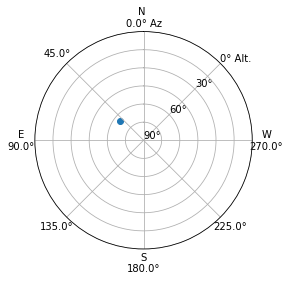

In [206]:
#position of target at midnight
plot_sky(target, Whipple, midnight_Whipple);

Now let us see how the target moves over the course of the night


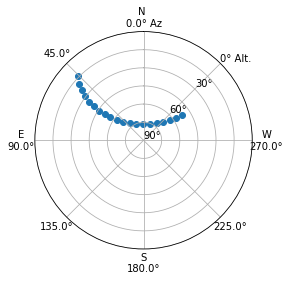

In [207]:
In [102]
t_start = eve_twil_Whipple
t_end = morn_twil_Whipple
t_observe = t_start + (t_end - t_start) * np.linspace(0.0, 1.0, 20)
plot_sky(target, Whipple, t_observe);

Airmass as a function of time


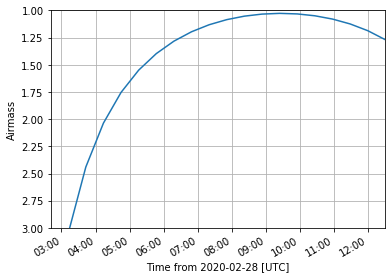

In [208]:
plot_airmass(target, Whipple, t_observe)
plt.grid();

## Finder Charts

Load an image of the field in which the target lies.


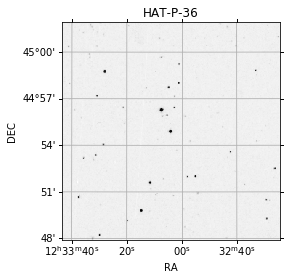

In [209]:
# field of view corresponding to the MLO 1.0-m telesocpe
fov = 14*u.arcmin

# plot the image
plot_finder_image(target, fov_radius=fov);

Now let's define an array of targets to work with

In [210]:
target_names = ['vega', 'polaris', 'm1', 'm42', 'm55']
targets = [FixedTarget.from_name(target) for target in target_names]
targets

[<FixedTarget "vega" at SkyCoord (ICRS): (ra, dec) in deg (279.23473479, 38.78368896)>,
 <FixedTarget "polaris" at SkyCoord (ICRS): (ra, dec) in deg (37.95456067, 89.26410897)>,
 <FixedTarget "m1" at SkyCoord (ICRS): (ra, dec) in deg (83.63308333, 22.0145)>,
 <FixedTarget "m42" at SkyCoord (ICRS): (ra, dec) in deg (83.82208333, -5.39111111)>,
 <FixedTarget "m55" at SkyCoord (ICRS): (ra, dec) in deg (294.99879167, -30.96475)>]

are the targets up now?

In [211]:
Whipple.target_is_up(now, targets)

array([ True,  True, False, False,  True])

Are the targets up at midnight

In [212]:
Whipple.target_is_up(midnight_Whipple, targets)

array([ True,  True,  True,  True, False])

## which the targets rise to an elevation of 10 degrees. Use target_rise_time.


In [213]:
targetrise = Whipple.target_rise_time(now, target, which = 'next', horizon=0*u.deg)
print(targetrise.iso)  #default format is JD

2020-02-28 00:57:01.185


how does the elevation vary over the night?

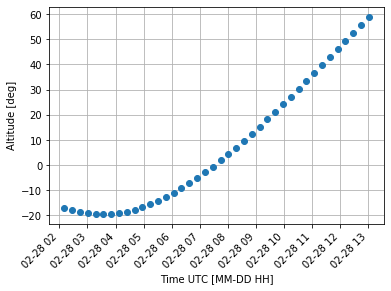

In [214]:
times = (t_start - 0.5 * u.h) + (t_end - t_start + 1 * u.h) * np.linspace(0.0, 1.0, 40)
elevations = Whipple.altaz(times, targets[0]).alt
ax = plt.gca()
ax.plot_date(times.plot_date, elevations.deg)
ax.set(xlabel = 'Time UTC [MM-DD HH]', ylabel = 'Altitude [deg]')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.grid()

## Oberservable Constraints

when a target is "observable"

twilight level (e.g., "Civil")

airmass

altitude limits

In [215]:
from astroplan import (AltitudeConstraint, AirmassConstraint,
                       AtNightConstraint, MoonSeparationConstraint)
constraints = [AltitudeConstraint(15*u.deg, 84*u.deg),
               AirmassConstraint(3), AtNightConstraint.twilight_civil(), MoonSeparationConstraint(min = 10 * u.deg)]
t_range = Time([t_start - 0.5 * u.hour, t_end + 0.5 * u.hour])

In [216]:
from astroplan import is_observable, is_always_observable, months_observable

# Are targets ever observable in the time range?
ever_observable = is_observable(constraints, Whipple, targets, time_range=t_range)
print(ever_observable)

# Are targets always observable in the time range?
always_observable = is_always_observable(constraints, Whipple, targets, time_range=t_range)
print(always_observable)

[ True  True  True  True False]
[False  True False False False]


print a table of the findings

In [217]:
from astropy.table import Table
observability_table = Table()
observability_table['targets'] = [target.name for target in targets]
observability_table['ever_observable'] = ever_observable
observability_table['always_observable'] = always_observable
print(observability_table)

targets ever_observable always_observable
------- --------------- -----------------
   vega            True             False
polaris            True              True
     m1            True             False
    m42            True             False
    m55           False             False


When are they actually observable?

In [140]:
from astroplan import observability_table
table = observability_table(constraints, Whipple, targets, time_range = t_range)
print(table)

target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
       vega            True             False          0.3181818181818182
    polaris            True              True                         1.0
         m1            True             False          0.5454545454545454
        m42            True             False         0.45454545454545453
        m55           False             False                         0.0


In [141]:
# During what months are the targets ever observable?
months_observable(constraints, Whipple, targets)

[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 {1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12},
 {1, 2, 3, 4, 5, 8, 9, 10, 11, 12},
 {3, 4, 5, 6, 7, 8, 9, 10, 11}]